In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from scipy.stats import randint
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR


from sklearn.impute import SimpleImputer

from pandas.plotting import scatter_matrix

from zlib import crc32
import hashlib
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
np.random.seed(42)

### Machine Learning Notebook 1

This notebook provides an end to end example using machine learning. Further notebooks will provide more of an in depth look at various aspects of the field. 

There are lots of resources that describe what machine learning is, and the differences between supervised, unsupervised or semi-supervised learning; what feature extraction and feature engineering means and why it is important; what terms like dimensionality reduction, learning rate, batch vs. oneline mean. 

I won't dwell on the meaning of these terms here, and the best resource I have come across to get up to speed with the basic terminology is Aurelien's Hands On Machine Learning. This will give you a good working knowledge of the field. Th purpose of this series of notebooks (which draws heavily from the Aurelian's code) is for me to have easy access to notes and code I can resuse. 

Whether this field is called Machine Learning, Deep Learning or Artficial Intelligence, the mathematics involved is very simlilar and its best not to get caught up in the semantics of how this field is described. The field of Machine Learning is still in relative infancy, as as such its nomenclature is vague. 

Finally, it is best not to think that Machine Learning is more complicated than it needs to be. Human beings have the ability to extract information from the word around them and encode this information into some kind of constrainted mathematical structure. They also have the ability to use the contraints of these mathematical structures to manipulate what is encoded, and use the outputs to make judgements about the world. That's all Machine Learning is and, in general, all mathematics is. 

The reason Machine Learaning can appear complex is twofold: firstly, the mathematical structures that information from the world is encoded into can appear complicated (everything from a 2D Cartesian plane to a Rheimann Sphere) and undertaking operations in these structures may require substantial mathematical experience. The future of Machine Learning will depend on having a deeper understanding of the constraints of these mathematical spaces. 

Secondly, in making inferences about predictions about the phenonem we experience, Machine Learning must take into take into account issues such as undertainty, belief and bias, nuanced ideas that exist in statistical fields of thought and can be difficult to integrate into mathematical reasoning

## Using Scikit Learn & Python

There are many choices of libraries and languages for undertaking machine learning. I tend to do most machine learning tasks in Python simply because I am very comfortable with the language and there is a large community. Scikit-Learn is a well known Machine Learning Python library, is well designed, and has been around for a long time. So if you are starting out with Machine Learning it is a good choice. It is also easy to integrate with the various stages of what takes place in Machine Learning, the Machine Learning Pipeline. In my experience the choice of library use will be more around the nature of model deployment and resource scalability rather than the available algorithms in library. In any case, Scikit-Learn is a great entry point, and can also be used at enterprise level

## The machine learning pipeline

It is critical to plan you machine learning work. I have found the best approach is a modular one, and the following steps will always take place

1. Import Data <br/>
This is a one-off activity at the beginning of a machine learning project, accessing the data you need in order to take on a machine learning task. This can become complicated if you are dealing with a large data set. It might be that the data needs to be subsetted in some way and the model needs to deal with each of subsets. Alternatively, the data may need to be streamed into the environment. 

2. Feature Engineering <br/>
I view Feature Engineering as any kind of engineering that needs to take place on the data. This can include basic transformations to fix data types, thorugh to normalisation, various standardisations, imputation, etc. It is often the case that there may be multiple iterations of feature engineering during a Machine Learning project. It is also the best step to divide the data into different subsets that can be used to train a Machine Learning model, and used to test the accuracy of a Machine Learning model

3. Model Building <br/>
Once data is made ready for use, the next step is to build a model that can be used to undertake particular Machine Learning tasks. There are a vast amount of models out there, and it may be that multiple models are evaluated to see which perform best. The purpose of a Machine Learning model is to allow prediction. The model is a mechanism that takes a number of inputs (for example, blood-sugar, cholestarol, age, gender) is is possible to predict an outcome of interest (for example, the risk of stroke). 

4.  Evaluation  <br/>
After the model has been created and used with the data, it needs to be evaluated in terms of how well it predicts an outcome in terms of data it has not seen.

All of these steps presents thier own challenges. Importing large data can be tricky. There might be extensive transformations required to make the data suited to Machine Learning making feature engineering time consuming. Depending on the success of evaluation phase, it is often the case that more feature engineering or model building is needed. You will often iterate through steps 2-4 multiple times to get it right. 

There is much related terminology related to Machine Learning. As a relatively young field, it also define things that may be named differently in other fields. Some initial terminoloy to work with Machine Learning is as follows: 

 $m$: number of instances in the data (identical to the number of observations in statistics data
 
 $Feature$: A particular variable in the data aset 
 
 $x^i$ is vector of all feature values of ith instannce and y^(i) is its label
 
 X is matrix containing all feature values
 
 h is systems prediction function, also called hypothesis
 
 y-hat is preducted variable
 
 
The following example will be an end to end to describe some of the challenges above. 


### Step 1: Import Data

As a general rule, I keep the data in a Data folder as part of the project. If its too big, then I would be calling it in from a Database

In [4]:
housing = pd.read_csv("../Data/datasets/housing/housing.csv")
housing.head(1)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY

With any data, its a good first step to check things like data types, basic descriptive statistics, and the distribution of counts. Some of the characteristics about the 20640 observations are as follows:

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Note that this one is 

In [197]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Step 2: Feature Engineering

The first thing I will do is split the data into train and test set

In [200]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [201]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [202]:

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [203]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [204]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [205]:

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [206]:
test_set.head().T

8          10         11         12         13
index                       8         10         11         12         13
longitude             -122.26    -122.26    -122.26    -122.26    -122.26
latitude                37.84      37.85      37.85      37.85      37.84
housing_median_age       42.0       52.0       52.0       52.0       52.0
total_rooms            2555.0     2202.0     3503.0     2491.0      696.0
total_bedrooms          665.0      434.0      752.0      474.0      191.0
population             1206.0      910.0     1504.0     1098.0      345.0
households              595.0      402.0      734.0      468.0      174.0
median_income          2.0804     3.2031     3.2705      3.075     2.6736
median_house_value   226700.0   281500.0   241800.0   213500.0   191300.0
ocean_proximity      NEAR BAY   NEAR BAY   NEAR BAY   NEAR BAY   NEAR BAY
id                 -122222.16 -122222.15 -122222.15 -122222.15 -122222.16

In [207]:
# careful of stratified sampling - sample the instnances to maintain ratios of original set
# suppose median house income is important 

<AxesSubplot:>

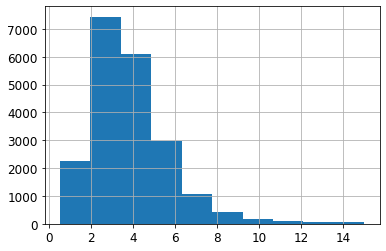

In [208]:
housing["median_income"].hist()

In [209]:
# create stratfied sample

In [210]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [211]:
housing.head().T

0         1         2         3         4
longitude            -122.23   -122.22   -122.24   -122.25   -122.25
latitude               37.88     37.86     37.85     37.85     37.85
housing_median_age      41.0      21.0      52.0      52.0      52.0
total_rooms            880.0    7099.0    1467.0    1274.0    1627.0
total_bedrooms         129.0    1106.0     190.0     235.0     280.0
population             322.0    2401.0     496.0     558.0     565.0
households             126.0    1138.0     177.0     219.0     259.0
median_income         8.3252    8.3014    7.2574    5.6431    3.8462
median_house_value  452600.0  358500.0  352100.0  341300.0  342200.0
ocean_proximity     NEAR BAY  NEAR BAY  NEAR BAY  NEAR BAY  NEAR BAY
income_cat                 5         5         5         4         3

In [212]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [213]:
strat_test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
10970    -117.86     33.77                39.0       4159.0           655.0   
20351    -119.05     34.21                27.0       4357.0           926.0   
6568     -118.15     34.20                52.0       1786.0           306.0   
13285    -117.68     34.07                32.0       1775.0           314.0   
...          ...       ...                 ...          ...             ...   
20519    -121.53     38.58                33.0       4988.0          1169.0   
17430    -120.44     34.65                30.0       2265.0           512.0   
4019     -118.49     34.18                31.0       3073.0           674.0   
12107    -117.32     33.99                27.0       5464.0           850.0   
2398     -118.91     36.79                19.0       1616.0           324.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
10970      1669.0       651.0         4.6111            240300.0   
20351      2110.0       876.0         3.0119            218200.0   
6568       1018.0       322.0         4.1518            182100.0   
13285      1067.0       302.0         4.0375            121300.0   
...           ...         ...            ...                 ...   
20519      2414.0      1075.0         1.9728             76400.0   
17430      1402.0       471.0         1.9750            134000.0   
4019       1486.0       684.0         4.8984            311700.0   
12107      2400.0       836.0         4.7110            133500.0   
2398        187.0        80.0         3.7857             78600.0   

      ocean_proximity income_cat  
5241        <1H OCEAN          5  
10970       <1H OCEAN          4  
20351       <1H OCEAN          3  
6568           INLAND          3  
13285          INLAND          3  
...               ...        ...  
20519          INLAND          2  
17430      NEAR OCEAN          2  
4019        <1H OCEAN          4  
12107          INLAND          4  
2398           INLAND          3  

[4128 rows x 11 columns]

In [214]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [215]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [216]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [217]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [218]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.039826    0.039729  0.040213      0.973236      -0.243309
2  0.318847    0.318798  0.324370      1.732260      -0.015195
3  0.350581    0.350533  0.358527      2.266446      -0.013820
4  0.176308    0.176357  0.167393     -5.056334       0.027480
5  0.114438    0.114583  0.109496     -4.318374       0.127011

In [219]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 4. Data Exploration

In [220]:
housing = strat_train_set.copy()

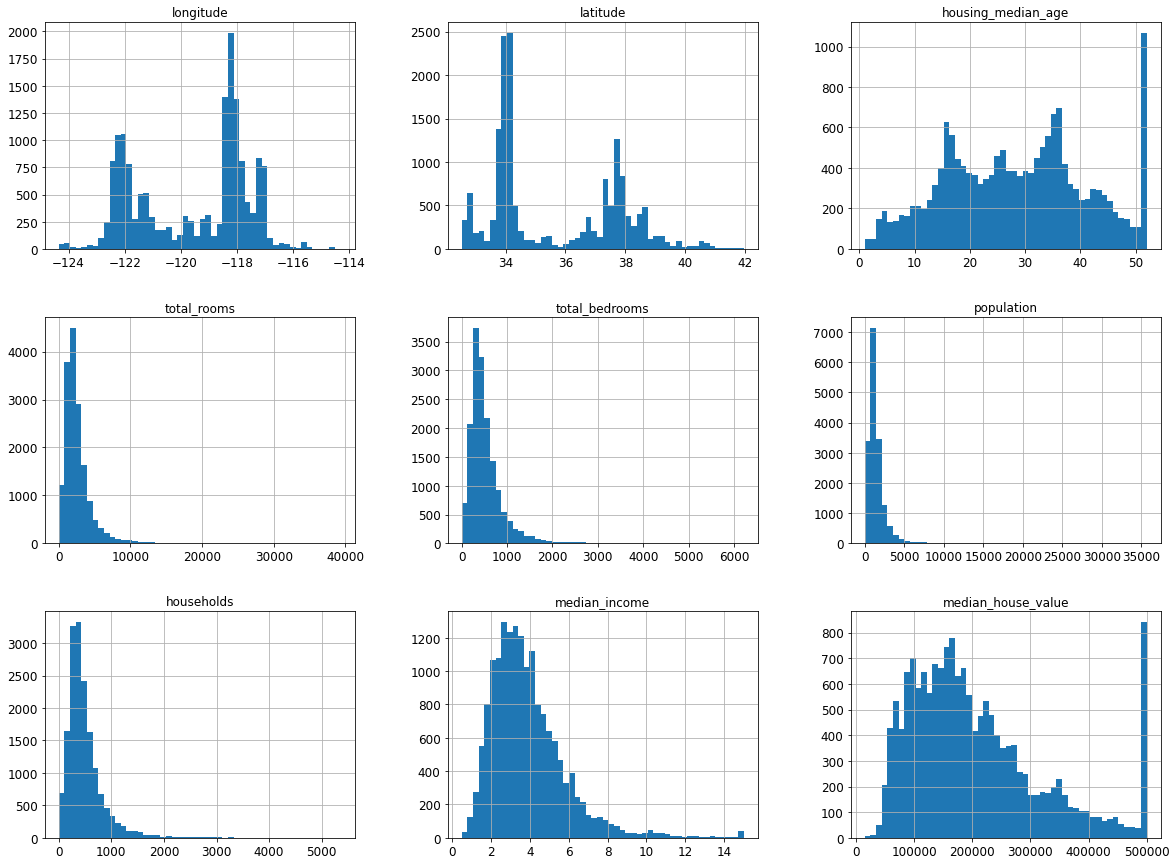

In [221]:
housing.hist(bins=50, figsize=(20, 15));

In [222]:
#N visualise lat and long

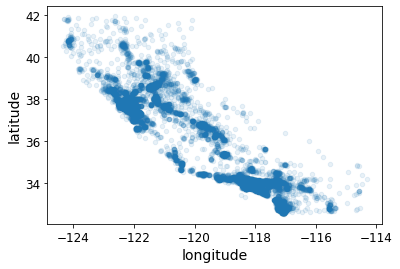

In [223]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);


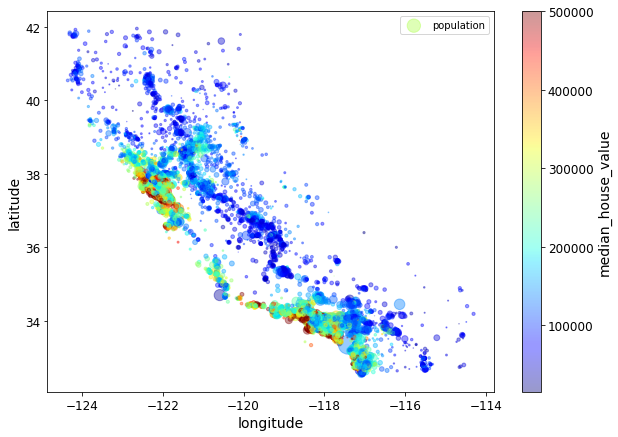

In [224]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [225]:
# this is california - housing prices increase towards ocean
# data set is not too large, look at standard correlation coefficient

In [226]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [227]:
# The correlation coefficient only measures linear correlations (“if x
# goes up, then y generally goes up/down”). It may completely miss
# out on nonlinear relationships (e.g., “if x is close to zero then y gen‐
# erally goes up”).

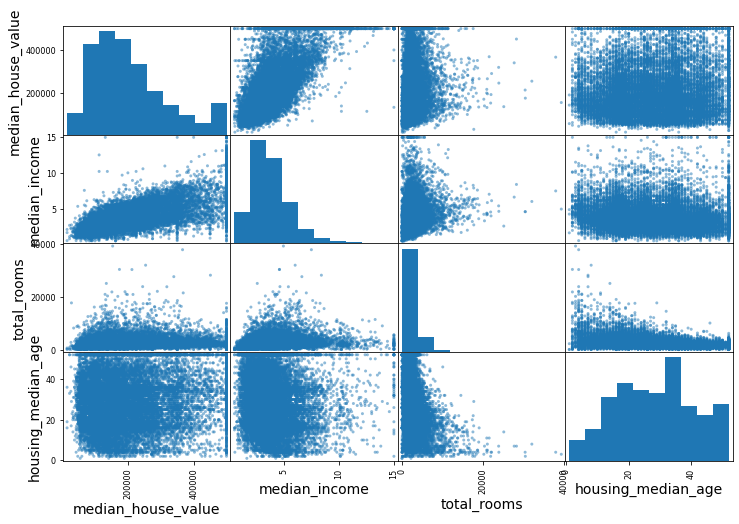

In [228]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));
# note middle group 

(0.0, 16.0, 0.0, 550000.0)

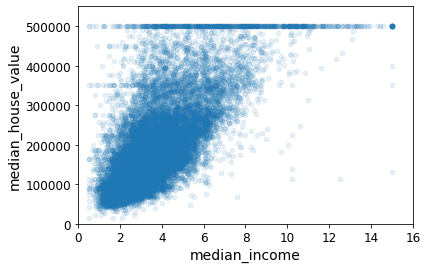

In [229]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [230]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.575834     35.639577           28.653101   2622.728319   
std        2.001860      2.138058           12.574726   2138.458419   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.800000     33.940000           18.000000   1443.000000   
50%     -118.510000     34.260000           29.000000   2119.500000   
75%     -118.010000     37.720000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16354.000000  16512.000000  16512.000000   16512.000000   
mean       534.973890   1419.790819    497.060380       3.875589   
std        412.699041   1115.686241    375.720845       1.904950   
min          2.000000      3.000000      2.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.566775   
50%        433.000000   1164.000000    408.000000       3.540900   
75%        644.000000   1719.250000    602.000000       4.744475   
max       6210.000000  35682.000000   5358.000000      15.000100   

       median_house_value  
count        16512.000000  
mean        206990.920724  
std         115703.014830  
min          14999.000000  
25%         119800.000000  
50%         179500.000000  
75%         263900.000000  
max         500001.000000

In [231]:
# create combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [232]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

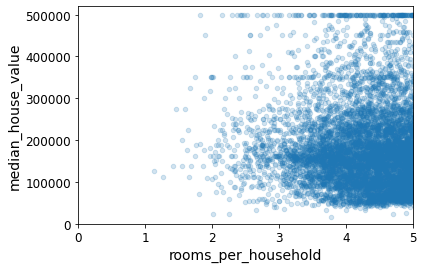

In [291]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [233]:
# The new bedrooms_per_room attribute is much more correlated with
# the median house value than the total number of rooms or bedrooms

### 5. Preprocession II

In [234]:
# Missing values
# 1. get rid of corresponding entries
# 2. get rid of whole attribute
# 3. set values to some value

In [292]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [293]:
# get incomplete rows
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4629     -118.30     34.07                18.0       3759.0             NaN   
6068     -117.86     34.01                16.0       4632.0             NaN   
17923    -121.97     37.35                30.0       1955.0             NaN   
13656    -117.30     34.05                 6.0       2155.0             NaN   
19252    -122.79     38.48                 7.0       6837.0             NaN   

       population  households  median_income ocean_proximity  
4629       3296.0      1462.0         2.2708       <1H OCEAN  
6068       3038.0       727.0         5.1762       <1H OCEAN  
17923       999.0       386.0         4.6328       <1H OCEAN  
13656      1039.0       391.0         1.6675          INLAND  
19252      3468.0      1405.0         3.1662       <1H OCEAN

In [294]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])  # get rid of corresponding

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]
Index: []

In [295]:
sample_incomplete_rows.drop("total_bedrooms", axis=1) # get rid of attribute

longitude  latitude  housing_median_age  total_rooms  population  \
4629     -118.30     34.07                18.0       3759.0      3296.0   
6068     -117.86     34.01                16.0       4632.0      3038.0   
17923    -121.97     37.35                30.0       1955.0       999.0   
13656    -117.30     34.05                 6.0       2155.0      1039.0   
19252    -122.79     38.48                 7.0       6837.0      3468.0   

       households  median_income ocean_proximity  
4629       1462.0         2.2708       <1H OCEAN  
6068        727.0         5.1762       <1H OCEAN  
17923       386.0         4.6328       <1H OCEAN  
13656       391.0         1.6675          INLAND  
19252      1405.0         3.1662       <1H OCEAN

In [296]:
median = housing["total_bedrooms"].median() # fill it with something
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [297]:
# create an imputer
imputer = SimpleImputer(strategy="median")

In [298]:
housing_num = housing.drop("ocean_proximity", axis=1) # to use, drop text

In [299]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [300]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [301]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [302]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [303]:
housing_tr

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  
17606       710.0       339.0         2.7042  
18632       306.0       113.0         6.4214  
14650       936.0       462.0         2.8621  
3230       1460.0       353.0         1.8839  
3555       4459.0      1463.0         3.0347  
...           ...         ...            ...  
6563        573.0       210.0         4.9312  
12053      1052.0       258.0         2.0682  
13908      2098.0       765.0         3.2723  
11159      1356.0       356.0         4.0625  
15775      1269.0       639.0         3.5750  

[16512 rows x 8 columns]

In [304]:
housing_tr.loc[sample_incomplete_rows.index.values]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4629     -118.30     34.07                18.0       3759.0           433.0   
6068     -117.86     34.01                16.0       4632.0           433.0   
17923    -121.97     37.35                30.0       1955.0           433.0   
13656    -117.30     34.05                 6.0       2155.0           433.0   
19252    -122.79     38.48                 7.0       6837.0           433.0   

       population  households  median_income  
4629       3296.0      1462.0         2.2708  
6068       3038.0       727.0         5.1762  
17923       999.0       386.0         4.6328  
13656      1039.0       391.0         1.6675  
19252      3468.0      1405.0         3.1662

change proxmisity to ocean is alternative

In [305]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

In [306]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [307]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [308]:
# leads to problem that this is not really about distance
# fix by creating 1 binary attribute per category
# make 1 attribute 1, all others cold (0) - one hot encoding

In [309]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [310]:
# note output is a sparse matris, not numpy array
housing_cat

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
...               ...
6563           INLAND
12053          INLAND
13908          INLAND
11159       <1H OCEAN
15775        NEAR BAY

[16512 rows x 1 columns]

In [311]:
# provides sparse array
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [312]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [313]:
# costum transformers

# adds custom methods fit(), transform)_, fit_transform

# these can be used 

In [314]:
# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): # fit transform from mixin
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [315]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [316]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

longitude latitude housing_median_age total_rooms total_bedrooms  \
17606   -121.89    37.29               38.0      1568.0          351.0   
18632   -121.93    37.05               14.0       679.0          108.0   
14650    -117.2    32.77               31.0      1952.0          471.0   
3230    -119.61    36.31               25.0      1847.0          371.0   
3555    -118.59    34.23               17.0      6592.0         1525.0   

      population households median_income ocean_proximity rooms_per_household  \
17606      710.0      339.0        2.7042       <1H OCEAN            4.625369   
18632      306.0      113.0        6.4214       <1H OCEAN             6.00885   
14650      936.0      462.0        2.8621      NEAR OCEAN            4.225108   
3230      1460.0      353.0        1.8839          INLAND            5.232295   
3555      4459.0     1463.0        3.0347       <1H OCEAN             4.50581   

      population_per_household  
17606                 2.094395  
18632                 2.707965  
14650                 2.025974  
3230                  4.135977  
3555                  3.047847

## Pipeline

In [317]:
# Feature scaling
# generally dont scale targets

# common methods to get same scale: min-max (everything 0-1)scaling and 
# standardisation, not bound to range, subtract mean, divide by sd - less affected by outliers - standardScalar

In [318]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])



# data passed to imputer, then 
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [319]:
# data passe
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [320]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [321]:
housing_prepared.shape

(16512, 16)

In [322]:
# consider more and less sophisticated solutions

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [323]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [324]:
np.allclose(housing_prepared, old_housing_prepared)

True

## Training 

Planning is also needed to pin down exactly what the nature of problem to be solved is, and the best way to solve it. Decisions will be need to made as to whether, for example, the solution should be simple or multiple regression, whether its a classification or regression problem. Regardless of this however, iterating through the above 4 steps is the best approach. 


In [325]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [327]:
housing_labels.values

array([286600., 340600., 196900., ...,  97800., 225900., 500001.])

In [328]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [334]:
housing.head().T

17606      18632       14650   3230       3555 
longitude             -121.89    -121.93      -117.2 -119.61    -118.59
latitude                37.29      37.05       32.77   36.31      34.23
housing_median_age       38.0       14.0        31.0    25.0       17.0
total_rooms            1568.0      679.0      1952.0  1847.0     6592.0
total_bedrooms          351.0      108.0       471.0   371.0     1525.0
population              710.0      306.0       936.0  1460.0     4459.0
households              339.0      113.0       462.0   353.0     1463.0
median_income          2.7042     6.4214      2.8621  1.8839     3.0347
ocean_proximity     <1H OCEAN  <1H OCEAN  NEAR OCEAN  INLAND  <1H OCEAN

In [335]:
# try with a few instances - use the original data and the processing pipeline
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [330]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [331]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

## Evaluation

 typical might be RMSE - higher weight on larger errors (Euclidiean norm, l2 norm, ||\cdot||_2)
 or might Mean absolute error - again just what is says - also l_1 norm, manhatten norm
 RMSE and MAE are DISTANCE ways to measure distnance between vectors
 notion of norm index here as well, which can tell which is best to use

In [340]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [343]:
# this is the error of the house price in dollars 0 model underfitting, 
# needs more features, or model with less constraints

In [344]:
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

In [345]:
#Not very good. 

# try something else

# Decision Tree Regressor

In [346]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [347]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [348]:
# badly overfitted the data

## Evaluation II: cross validation

In [357]:
# radomly break the data set into 10 distinct subsets
# then goes through every subset of 9 and train, and envaluate on the other one. Provides 10 evaluation scores


scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [358]:
# this shows not that good - look at spread of values

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


In [359]:
# try lin reg with this approach

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983416


In [361]:
# deciion tree overfitting so badly it perfoms worse

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [362]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [364]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


In [367]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()


count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

In [370]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [366]:
# this leads to a number of models: Lin Reg, Decis, RandomFroest. Now to fine tune them

# next idea to mess with the hyperparams to get a good combination. To automate this, use gridsearch

In [372]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [373]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [374]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [375]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [376]:
# which hyperams are best

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.047215      0.003429         0.003342        0.000618   
1        0.145790      0.001744         0.008128        0.000167   
2        0.446294      0.010291         0.022789        0.000560   
3        0.074077      0.001663         0.003106        0.000125   
4        0.241182      0.002924         0.008182        0.000178   
5        0.722029      0.007475         0.022868        0.000445   
6        0.101677      0.003916         0.003269        0.000306   
7        0.336352      0.006380         0.008587        0.000230   
8        1.022240      0.007765         0.023044        0.000265   
9        0.132388      0.002562         0.003217        0.000094   
10       0.446174      0.005178         0.008554        0.000184   
11       1.337796      0.012075         0.022930        0.000821   
12       0.070250      0.001561         0.003585        0.000167   
13       0.234965      0.001773         0.009529        0.000145   
14       0.096248      0.002087         0.003483        0.000087   
15       0.318625      0.003358         0.009709        0.000363   
16       0.118177      0.002416         0.003516        0.000088   
17       0.398380      0.004084         0.009499        0.000407   

   param_max_features param_n_estimators param_bootstrap  \
0                   2                  3             NaN   
1                   2                 10             NaN   
2                   2                 30             NaN   
3                   4                  3             NaN   
4                   4                 10             NaN   
5                   4                 30             NaN   
6                   6                  3             NaN   
7                   6                 10             NaN   
8                   6                 30             NaN   
9                   8                  3             NaN   
10                  8                 10             NaN   
11                  8                 30             NaN   
12                  2                  3           False   
13                  2                 10           False   
14                  3                  3           False   
15                  3                 10           False   
16                  4                  3           False   
17                  4                 10           False   

                                               params  split0_test_score  \
0              {'max_features': 2, 'n_estimators': 3}      -3.837622e+09   
1             {'max_features': 2, 'n_estimators': 10}      -3.047771e+09   
2             {'max_features': 2, 'n_estimators': 30}      -2.689185e+09   
3              {'max_features': 4, 'n_estimators': 3}      -3.730181e+09   
4             {'max_features': 4, 'n_estimators': 10}      -2.666283e+09   
5             {'max_features': 4, 'n_estimators': 30}      -2.387153e+09   
6              {'max_features': 6, 'n_estimators': 3}      -3.119657e+09   
7             {'max_features': 6, 'n_estimators': 10}      -2.549663e+09   
8             {'max_features': 6, 'n_estimators': 30}      -2.370010e+09   
9              {'max_features': 8, 'n_estimators': 3}      -3.353504e+09   
10            {'max_features': 8, 'n_estimators': 10}      -2.571970e+09   
11            {'max_features': 8, 'n_estimators': 30}      -2.357390e+09   
12  {'bootstrap': False, 'max_features': 2, 'n_est...      -3.785816e+09   
13  {'bootstrap': False, 'max_features': 2, 'n_est...      -2.810721e+09   
14  {'bootstrap': False, 'max_features': 3, 'n_est...      -3.618324e+09   
15  {'bootstrap': False, 'max_features': 3, 'n_est...      -2.757999e+09   
16  {'bootstrap': False, 'max_features': 4, 'n_est...      -3.134040e+09   
17  {'bootstrap': False, 'max_features': 4, 'n_est...      -2.525578e+09   

    split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0       -4.147108e+09  ...    -4.053756e+09  

In [377]:
# so best option is set hyperparams to 8, n_estimators hyperpam to 30

# 49682.273345071546 {'max_features': 8, 'n_estimators': 30}

In [378]:
# Also consider issue why hyperparam search space is large: better to suse RandomisedSearchCV

In [380]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ffa74f05670>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ffa74f05790>},
                   random_state=42, scoring='neg_mean_squared_error')

In [381]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


In [382]:
# then analysise the best features, and look at twhich are the most use

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [383]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

In [384]:
# note much of the occean proximisty type variables are of little use

## Evaluating on Test Data

In [385]:
# check on test data

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [387]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

 
“The Lack of A Priori Distinctions Between Learning Algorithms,” D. Wolpert (1996) - no free lunch